# Diabetes Challenge

Your task today is to **analyze** the Kaggle "Pima Indians Diabetes Database" and to **predict** whether a patient has Diabetes or not.

## Task:
- Load the data from the database. The schema is called `diabetes`. To connect to the database you need to copy the `.env` file from the visualization or hands-on-ml repository into this repo. Explore the database, try to establish what the relationships between the tables are (1-1, 1-N, N-M). Explain to yourself and the group what data do you see and whether it makes sense. What JOINs are appropriate to use and why? 
- Use at least two different classification algorithms we have learned so far to predict Diabetes patients. 
- Discuss before you start with the modeling process which **evaluation metric** you choose and explain why.
- Implement a GridSearchCV or RandomizedSearchCV to tune the hyperparameters of your model.
- **Optional:** If you have time at the end, try to use sklearn's pipline module to encapsulate all the steps into a pipeline.

Don't forget to split your data in train and test set. And analyze your final model on the test data. It might also be necessary to scale your data in order to improve the performance of some of the models.


## Helpful links and advise:
- [sklearn documentation on hyperparameter tuning](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)
- It might be helpful to check some sources on how to deal with imbalanced data. 
    * [8 Tactics to Combat Imbalanced Classes](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)
    * [Random-Oversampling/Undersampling](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/)


# Data Description

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## About this dataset
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. For the outcome class value 1 is interpreted as "tested positive for diabetes".

|Column Name| Description|
|:------------|:------------|
|Pregnancies|Number of times pregnant|
|Glucose|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|BloodPressure|Diastolic blood pressure (mm Hg)|
|SkinThickness|Triceps skin fold thickness (mm)|
|Insulin|2-Hour serum insulin (mu U/ml)|
|BMI|Body mass index (weight in kg/(height in m)^2)|
|DiabetesPedigreeFunction| Diabetes pedigree function|
|Age| Age (years)|
|Outcome|Class variable (0 or 1) |

In [ ]:
# import dotenv to access a database URL from a .env file
from dotenv import load_dotenv
from sqlalchemy import create_engine
import os
import pandas as pd

# Load environment variables from .env file
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

query_string = '''select s.id, s.skinthickness, p."Age", p.bmi, p.pregnancies, 
po.diabetespedigreefunction, po.outcome, bm.bloodpressure, bm.glucose, bm.insulin, bm.measurement_date     
from diabetes.skin s
left join diabetes.patient p 
on s.id = p.id
left join diabetes.pedigree_outcome po
on s.id = po.id
left join diabetes.blood_metrics bm
on s.id = bm.patientid;'''

# Import with pandas
df_sqlalchemy = pd.read_sql(query_string, db)
df_sqlalchemy.head()


id  skinthickness  Age   bmi  pregnancies  diabetespedigreefunction   
0   1             35   50  33.6            6                     0.627  \
1   2             29   31  26.6            1                     0.351   
2   3              0   32  23.3            8                     0.672   
3   4             23   21  28.1            1                     0.167   
4   5             35   33  43.1            0                     2.288   

   outcome  bloodpressure  glucose  insulin measurement_date  
0        1             72      148        0       2022-12-13  
1        0             66       85        0       2022-12-13  
2        1             64      183        0       2022-12-13  
3        0             66       89       94       2022-12-13  
4        1             40      137      168       2022-12-13

In [ ]:
df_sqlalchemy.to_csv('data/diabetes_data.csv', index=False)

### EDA

In [8]:
import seaborn as sns

In [ ]:
df = df_sqlalchemy.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1536 non-null   int64  
 1   skinthickness             1536 non-null   int64  
 2   Age                       1536 non-null   int64  
 3   bmi                       1536 non-null   float64
 4   pregnancies               1536 non-null   int64  
 5   diabetespedigreefunction  1536 non-null   float64
 6   outcome                   1536 non-null   int64  
 7   bloodpressure             1536 non-null   int64  
 8   glucose                   1536 non-null   int64  
 9   insulin                   1536 non-null   int64  
 10  measurement_date          1536 non-null   object 
dtypes: float64(2), int64(8), object(1)
memory usage: 132.1+ KB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        1536 non-null   int64         
 1   skinthickness             1536 non-null   int64         
 2   Age                       1536 non-null   int64         
 3   bmi                       1536 non-null   float64       
 4   pregnancies               1536 non-null   int64         
 5   diabetespedigreefunction  1536 non-null   float64       
 6   outcome                   1536 non-null   int64         
 7   bloodpressure             1536 non-null   int64         
 8   glucose                   1536 non-null   int64         
 9   insulin                   1536 non-null   int64         
 10  measurement_date          1536 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 132.1 KB


In [6]:
df.describe()

id  skinthickness          Age          bmi  pregnancies   
count  1536.000000    1536.000000  1536.000000  1536.000000  1536.000000  \
mean    384.500000      20.536458    33.240885    31.992578     3.845052   
std     221.774519      15.947021    11.756400     7.881592     3.368480   
min       1.000000       0.000000    21.000000     0.000000     0.000000   
25%     192.750000       0.000000    24.000000    27.300000     1.000000   
50%     384.500000      23.000000    29.000000    32.000000     3.000000   
75%     576.250000      32.000000    41.000000    36.600000     6.000000   
max     768.000000      99.000000    81.000000    67.100000    17.000000   

       diabetespedigreefunction      outcome  bloodpressure      glucose   
count               1536.000000  1536.000000    1536.000000  1536.000000  \
mean                   0.471876     0.348958      66.077474   111.448568   
std                    0.331221     0.476796      28.685056    47.957391   
min                    0.078000     0.000000       0.000000     0.000000   
25%                    0.243750     0.000000      52.000000    86.000000   
50%                    0.372500     0.000000      70.000000   112.000000   
75%                    0.626250     1.000000      84.000000   145.000000   
max                    2.420000     1.000000     122.000000   200.000000   

           insulin  
count  1536.000000  
mean     64.104167  
std      85.512547  
min       0.000000  
25%       1.000000  
50%      45.000000  
75%      85.250000  
max     846.000000

In [7]:
df.isna().sum()

id                          0
skinthickness               0
Age                         0
bmi                         0
pregnancies                 0
diabetespedigreefunction    0
outcome                     0
bloodpressure               0
glucose                     0
insulin                     0
measurement_date            0
dtype: int64

In [12]:
# convert measurement_date to datetime
df['measurement_date'] = pd.to_datetime(df['measurement_date'])

In [14]:
df.measurement_date

0      2022-12-13
1      2022-12-13
2      2022-12-13
3      2022-12-13
4      2022-12-13
          ...    
1531   2022-12-01
1532   2022-12-01
1533   2022-12-01
1534   2022-12-01
1535   2022-12-01
Name: measurement_date, Length: 1536, dtype: datetime64[ns]

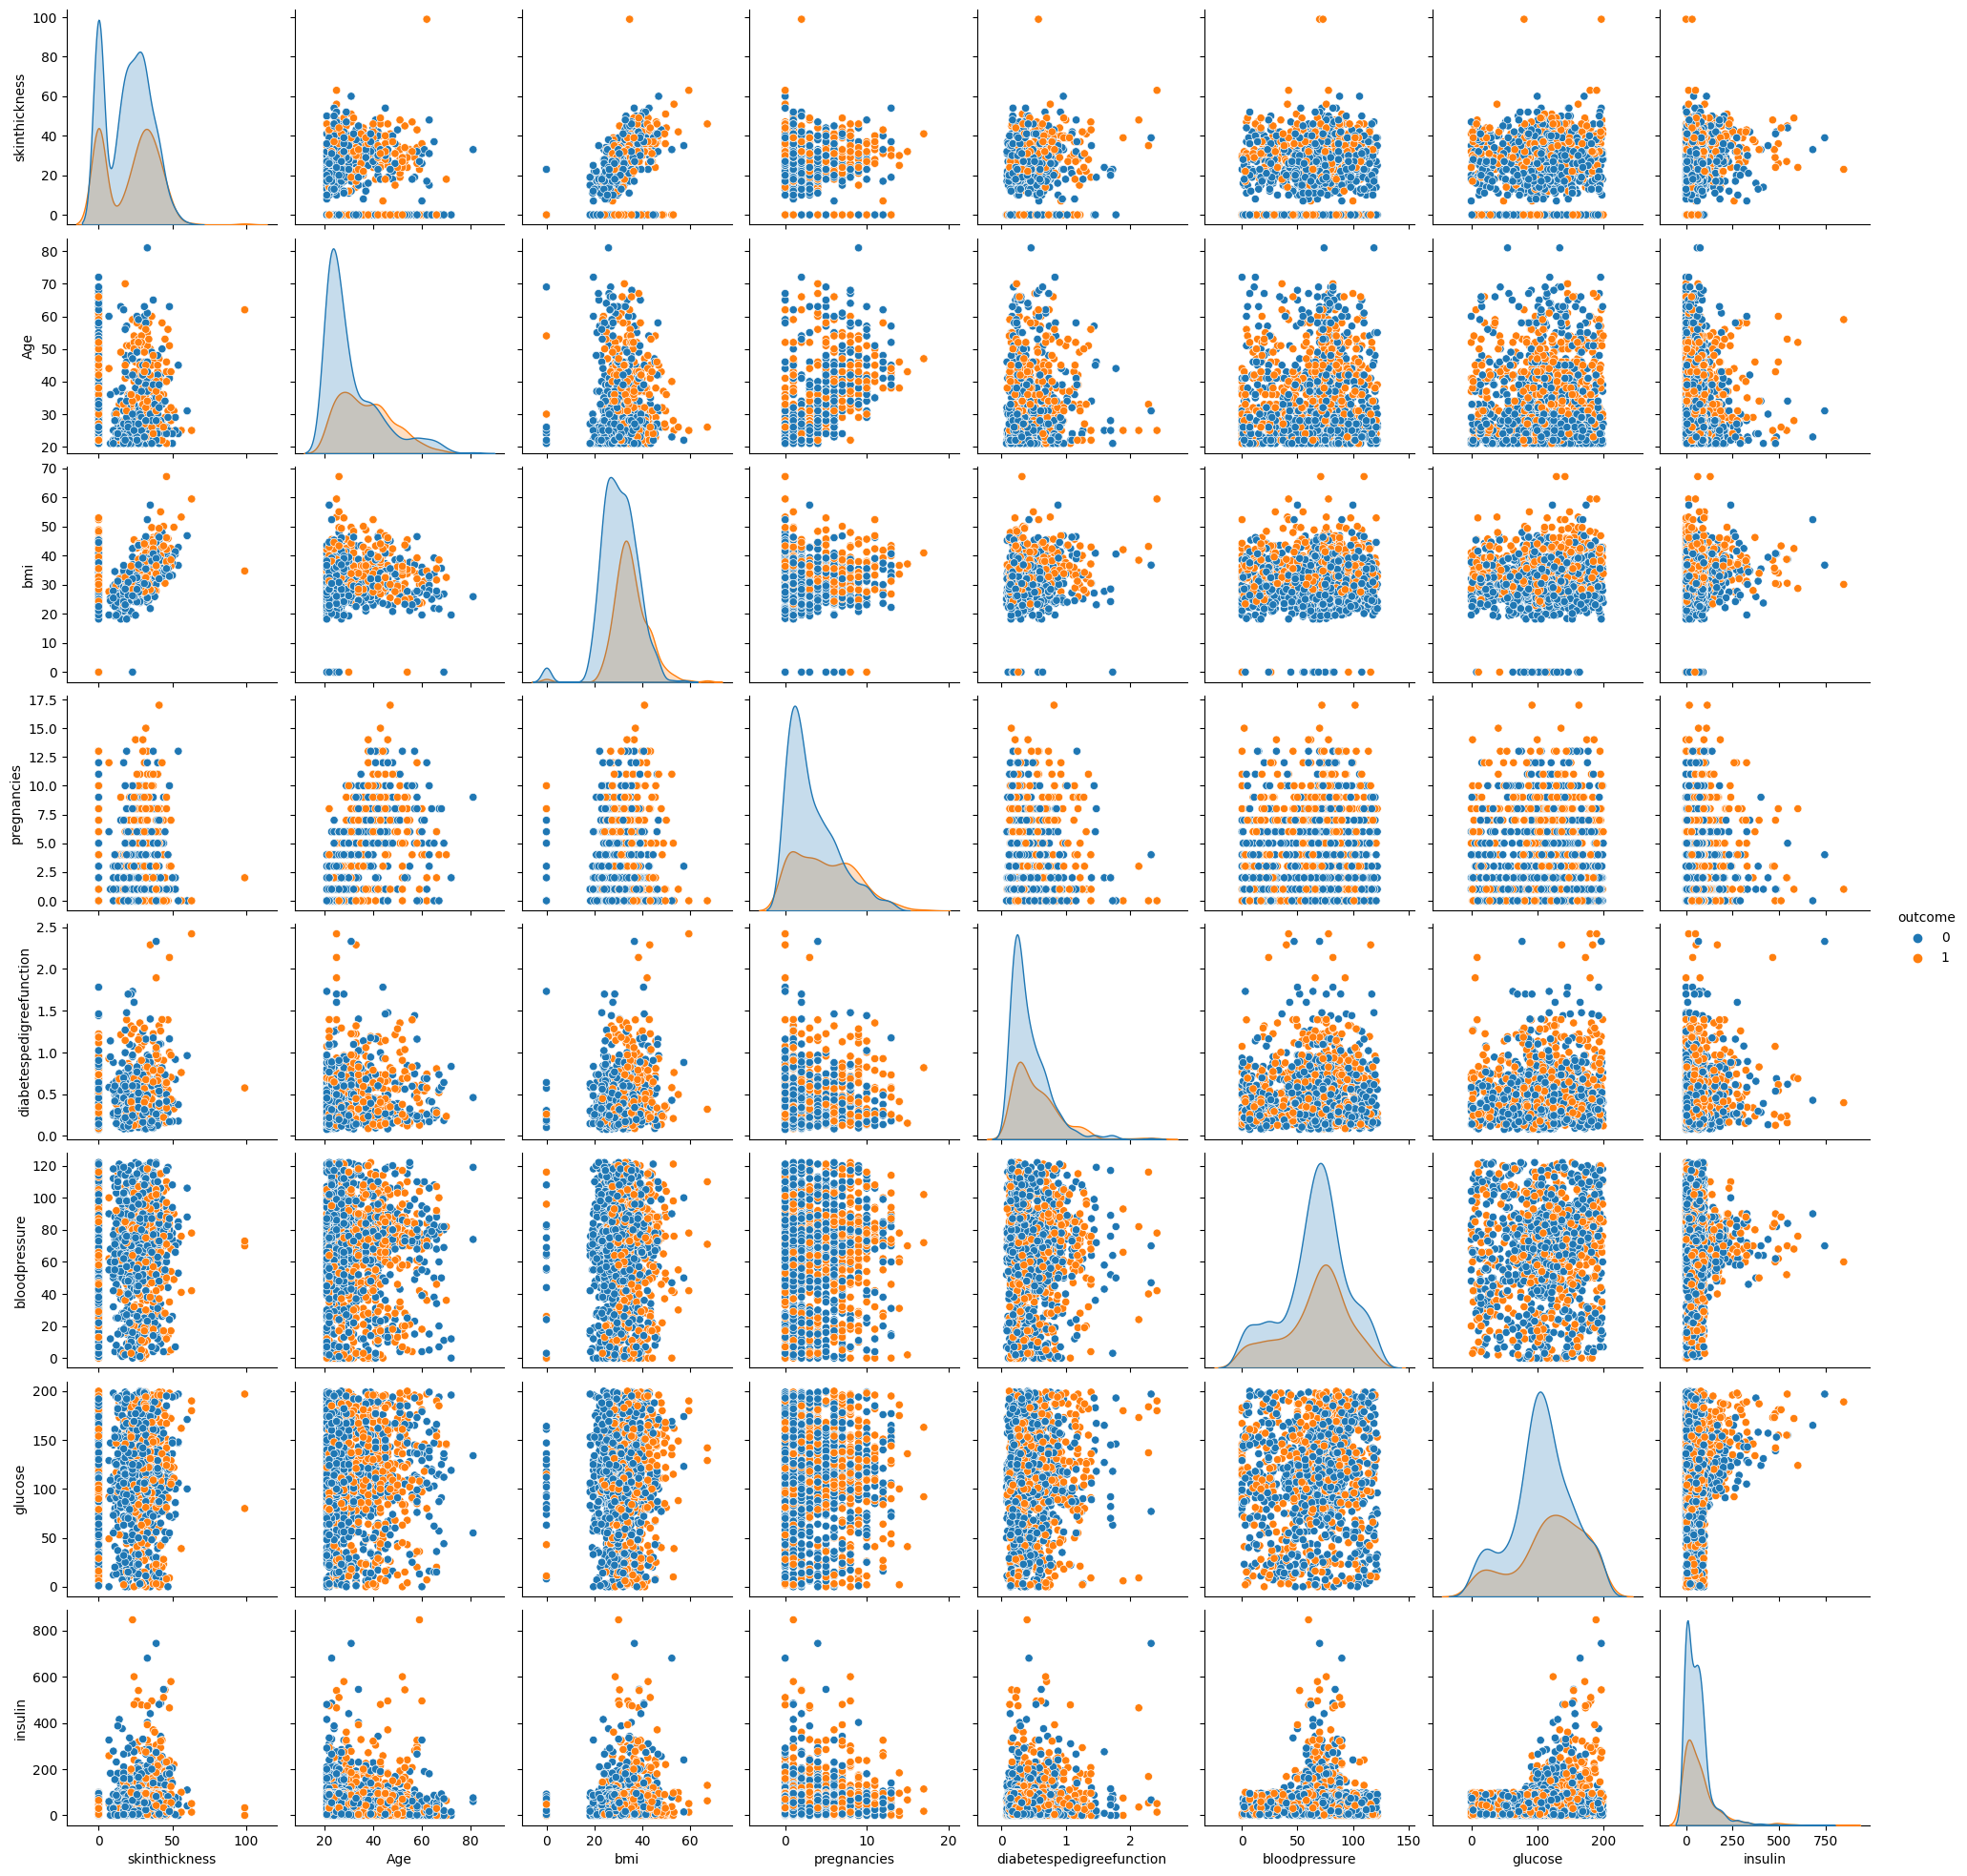

In [ ]:
# drop columns id and measurement_date
pairplot_data = df.drop(columns=['id', 'measurement_date'])
sns.pairplot(pairplot_data, hue='outcome')

<Axes: >

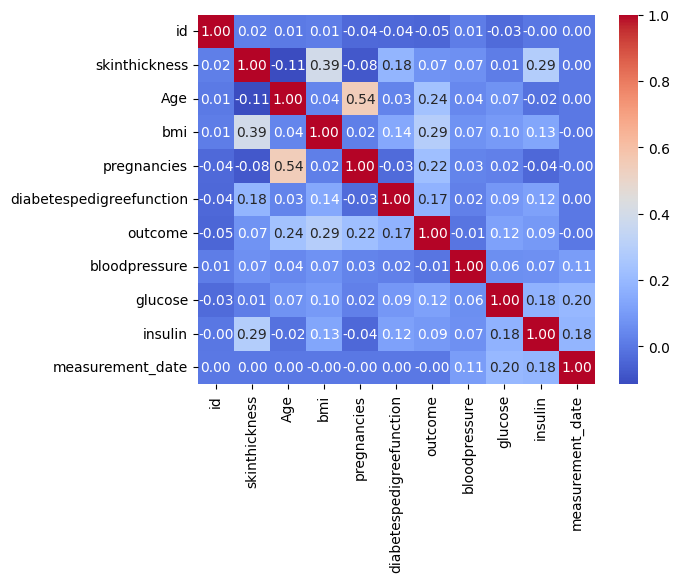

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [24]:
# check for blood_pressure values less than or equal to 10
df[df['bloodpressure'] == 0]

id  skinthickness  Age   bmi  pregnancies  diabetespedigreefunction   
7      8              0   29  35.3           10                     0.134  \
15    16              0   32  30.0            7                     0.484   
49    50              0   24   0.0            7                     0.305   
60    61              0   21   0.0            2                     0.304   
78    79              0   26  43.2            0                     0.270   
81    82              0   22   0.0            2                     0.102   
172  173             23   25  28.9            2                     0.773   
193  194              0   40  52.3           11                     0.578   
222  223              0   37  25.2            7                     0.209   
261  262              0   27  30.0            3                     0.761   
266  267              0   25  36.3            0                     0.933   
269  270              0   28  27.5            2                     0.240   
300  301              0   30  32.3            0                     0.839   
332  333              0   41  43.3            1                     0.282   
336  337              0   44  33.8            0                     0.932   
347  348              0   23  23.5            3                     0.187   
357  358             30   44  39.9           13                     0.569   
426  427              0   25   0.0            0                     0.256   
430  431              0   23  22.2            2                     0.108   
435  436              0   29  42.4            0                     0.205   
453  454              0   72  19.6            2                     0.832   
468  469              0   38  30.0            8                     0.183   
484  485              0   31  44.2            0                     0.630   
494  495              0   22   0.0            3                     0.174   
522  523              0   26   0.0            6                     0.189   
533  534              0   31  29.8            6                     0.501   
535  536              0   23  32.9            4                     0.302   
589  590              0   25  21.1            0                     0.342   
601  602              0   28  23.7            6                     0.190   
604  605              0   36  28.4            4                     0.212   
619  620              0   24  32.4            0                     0.141   
643  644              0   31  28.0            4                     0.610   
697  698              0   22  25.0            0                     0.253   
703  704              0   41  38.5            2                     0.304   
706  707              0   30   0.0           10                     0.261   
988  221             29   21  34.6            0                     1.072   

     outcome  bloodpressure  glucose  insulin measurement_date  
7          0              0      115        0       2022-12-13  
15         1              0      100        0       2022-12-13  
49         0              0      105        0       2022-12-13  
60         0              0       84        0       2022-12-13  
78         1              0      131        0       2022-12-13  
81         0              0       74        0       2022-12-13  
172        0              0       87        0       2022-12-13  
193        1              0      135        0       2022-12-13  
222        0              0      119        0       2022-12-13  
261        1              0      141        0       2022-12-13  
266        1              0      138        0       2022-12-13  
269        1              0      146        0       2022-12-13  
300        1              0      167        0       2022-12-13  
332        1              0      180        0       2022-12-13  
336        0              0      117        0       2022-12-13  
347        0              0      116        0       2022-12-13  
357        1              0      129        0      

In [26]:
df[df['measurement_date'] == '2022-12-13']

id  skinthickness  Age   bmi  pregnancies  diabetespedigreefunction   
0      1             35   50  33.6            6                     0.627  \
1      2             29   31  26.6            1                     0.351   
2      3              0   32  23.3            8                     0.672   
3      4             23   21  28.1            1                     0.167   
4      5             35   33  43.1            0                     2.288   
..   ...            ...  ...   ...          ...                       ...   
763  764             48   63  32.9           10                     0.171   
764  765             27   27  36.8            2                     0.340   
765  766             23   30  26.2            5                     0.245   
766  767              0   47  30.1            1                     0.349   
767  768             31   23  30.4            1                     0.315   

     outcome  bloodpressure  glucose  insulin measurement_date  
0          1             72      148        0       2022-12-13  
1          0             66       85        0       2022-12-13  
2          1             64      183        0       2022-12-13  
3          0             66       89       94       2022-12-13  
4          1             40      137      168       2022-12-13  
..       ...            ...      ...      ...              ...  
763        0             76      101      180       2022-12-13  
764        0             70      122        0       2022-12-13  
765        0             72      121      112       2022-12-13  
766        1             60      126        0       2022-12-13  
767        0             70       93        0       2022-12-13  

[768 rows x 11 columns]

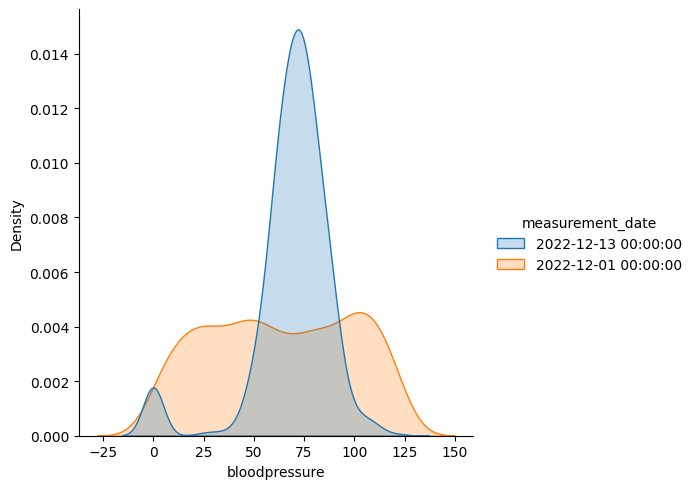

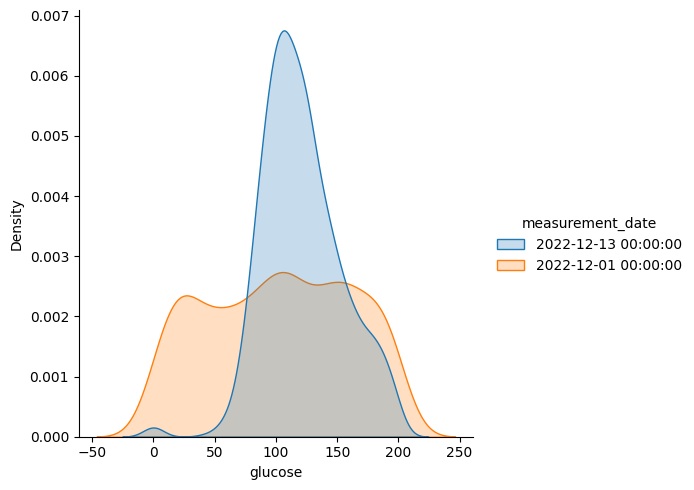

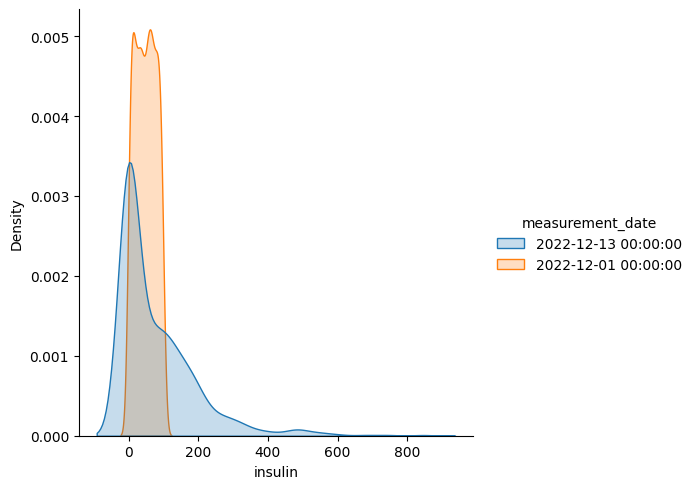

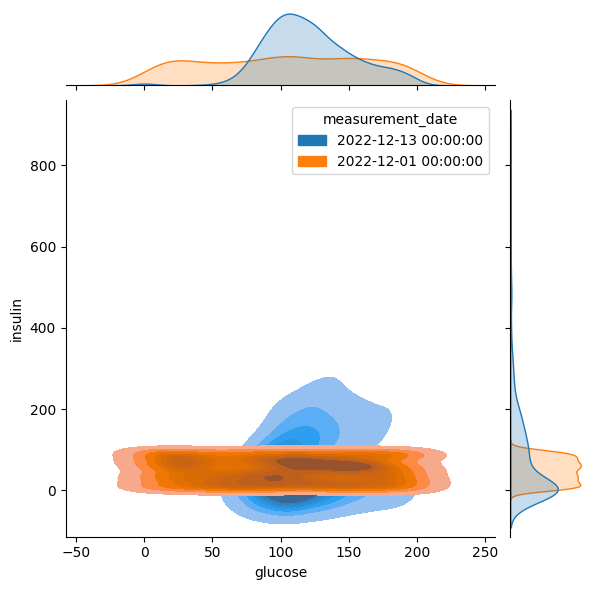

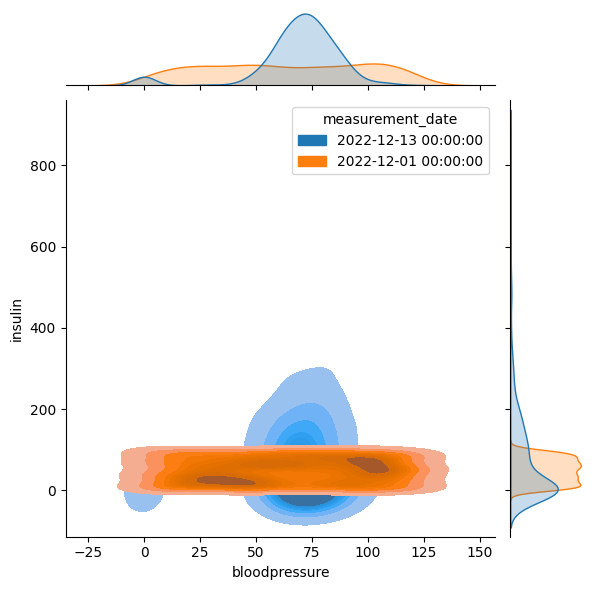

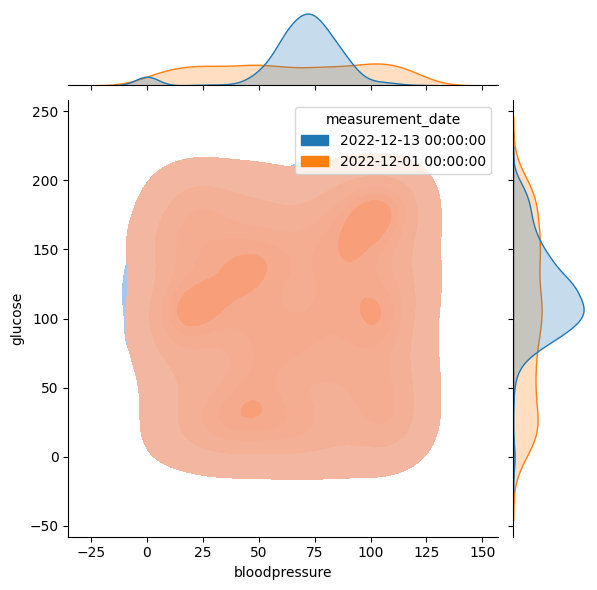

In [38]:
# plot the distributions of blood_pressure, glucose and insulin for the 2 different measurement dates
sns.displot(data=df, x='bloodpressure', hue='measurement_date', kind='kde', fill=True)
sns.displot(data=df, x='glucose', hue='measurement_date', kind='kde', fill=True)
sns.displot(data=df, x='insulin', hue='measurement_date', kind='kde', fill=True)

# plot the blood_pressure, glucose and insulin for the 2 different measurement dates as heatmap which shows how the values are distributed
sns.jointplot(data=df, x='glucose', y='insulin', hue='measurement_date', kind='kde', fill=True)
sns.jointplot(data=df, x='bloodpressure', y='insulin', hue='measurement_date', kind='kde', fill=True)
sns.jointplot(data=df, x='bloodpressure', y='glucose', hue='measurement_date', kind='kde', fill=True)

This results in dropping the 2022-12-01 date since the distributions are not reasonable for glucose or blood pressure (they are too even distributed)

In [39]:
df_date = df[df['measurement_date'] == '2022-12-13']

In [41]:
df_date = df_date.drop(columns=['measurement_date'])

In [42]:
df_date.describe()

id  skinthickness         Age         bmi  pregnancies   
count  768.000000     768.000000  768.000000  768.000000   768.000000  \
mean   384.500000      20.536458   33.240885   31.992578     3.845052   
std    221.846794      15.952218   11.760232    7.884160     3.369578   
min      1.000000       0.000000   21.000000    0.000000     0.000000   
25%    192.750000       0.000000   24.000000   27.300000     1.000000   
50%    384.500000      23.000000   29.000000   32.000000     3.000000   
75%    576.250000      32.000000   41.000000   36.600000     6.000000   
max    768.000000      99.000000   81.000000   67.100000    17.000000   

       diabetespedigreefunction     outcome  bloodpressure     glucose   
count                768.000000  768.000000     768.000000  768.000000  \
mean                   0.471876    0.348958      69.105469  120.894531   
std                    0.331329    0.476951      19.355807   31.972618   
min                    0.078000    0.000000       0.000000    0.000000   
25%                    0.243750    0.000000      62.000000   99.000000   
50%                    0.372500    0.000000      72.000000  117.000000   
75%                    0.626250    1.000000      80.000000  140.250000   
max                    2.420000    1.000000     122.000000  199.000000   

          insulin  
count  768.000000  
mean    79.799479  
std    115.244002  
min      0.000000  
25%      0.000000  
50%     30.500000  
75%    127.250000  
max    846.000000

## Data cleaning
What to do with skinthickness, bmi, bloodpressure, glucose = 0

In [83]:
df_date = df_date.drop(columns=['id'])

In [46]:
df_date[(df_date['bloodpressure'] == 0) & (df_date['skinthickness'] == 0) & (df_date['bmi'] == 0)]

id  skinthickness  Age  bmi  pregnancies  diabetespedigreefunction   
49    50              0   24  0.0            7                     0.305  \
60    61              0   21  0.0            2                     0.304   
81    82              0   22  0.0            2                     0.102   
426  427              0   25  0.0            0                     0.256   
494  495              0   22  0.0            3                     0.174   
522  523              0   26  0.0            6                     0.189   
706  707              0   30  0.0           10                     0.261   

     outcome  bloodpressure  glucose  insulin  
49         0              0      105        0  
60         0              0       84        0  
81         0              0       74        0  
426        0              0       94        0  
494        0              0       80        0  
522        0              0      114        0  
706        1              0      115        0

<Axes: xlabel='Age', ylabel='pregnancies'>

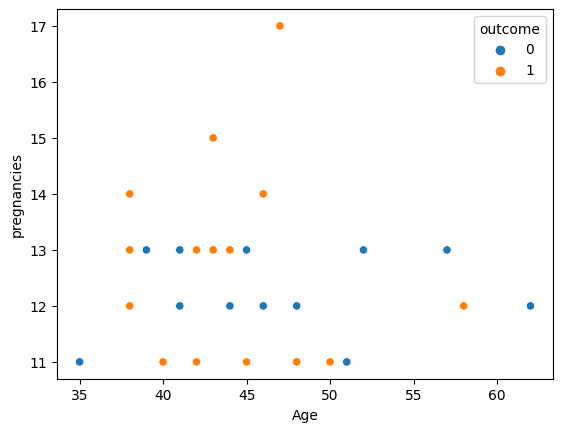

In [65]:
# mean age of pregnancies greater than 5

df_date[df_date['pregnancies'] > 10]
#scatterplot for the pregnancies > 10 for age distribution
sns.scatterplot(data=df_date[df_date['pregnancies'] > 10], y='pregnancies', x='Age', hue='outcome')

In [67]:
df_date[df_date['pregnancies'] > 10].shape

(34, 10)

In [47]:
df_date[(df_date['bloodpressure'] == 0)].shape

(35, 10)

In [54]:
df_date[(df_date['glucose'] == 0)].shape

(5, 10)

In [55]:
df_date[(df_date['skinthickness'] == 0)]

id  skinthickness  Age   bmi  pregnancies  diabetespedigreefunction   
2      3              0   32  23.3            8                     0.672  \
5      6              0   30  25.6            5                     0.201   
7      8              0   29  35.3           10                     0.134   
9     10              0   54   0.0            8                     0.232   
10    11              0   30  37.6            4                     0.191   
..   ...            ...  ...   ...          ...                       ...   
757  758              0   52  36.3            0                     0.258   
758  759              0   26  37.5            1                     0.197   
759  760              0   66  35.5            6                     0.278   
762  763              0   33  22.5            9                     0.142   
766  767              0   47  30.1            1                     0.349   

     outcome  bloodpressure  glucose  insulin  
2          1             64      183        0  
5          0             74      116        0  
7          0              0      115        0  
9          1             96      125        0  
10         0             92      110        0  
..       ...            ...      ...      ...  
757        1             72      123        0  
758        0             76      106        0  
759        1             92      190        0  
762        0             62       89        0  
766        1             60      126        0  

[227 rows x 10 columns]

In [50]:
df_date[(df_date['bmi'] == 0)].shape

(11, 10)

In [68]:
df_date[df_date['insulin'] == 0].shape

(374, 10)

<Axes: >

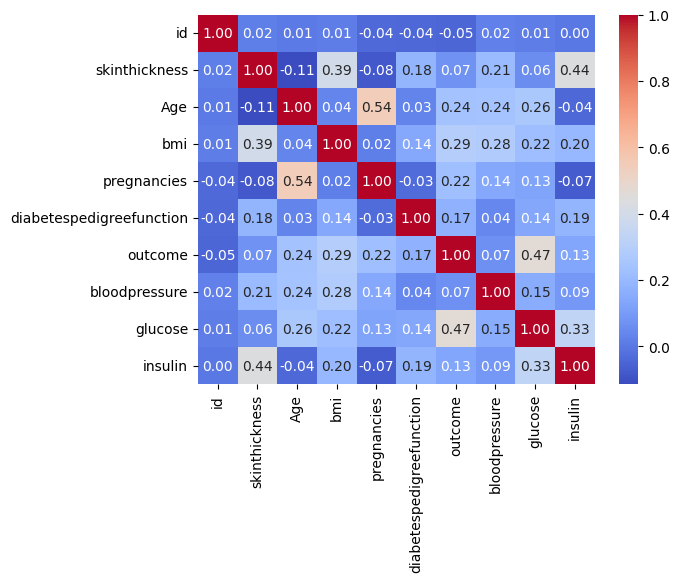

In [52]:
sns.heatmap(df_date.corr(), annot=True, cmap='coolwarm', fmt='.2f')

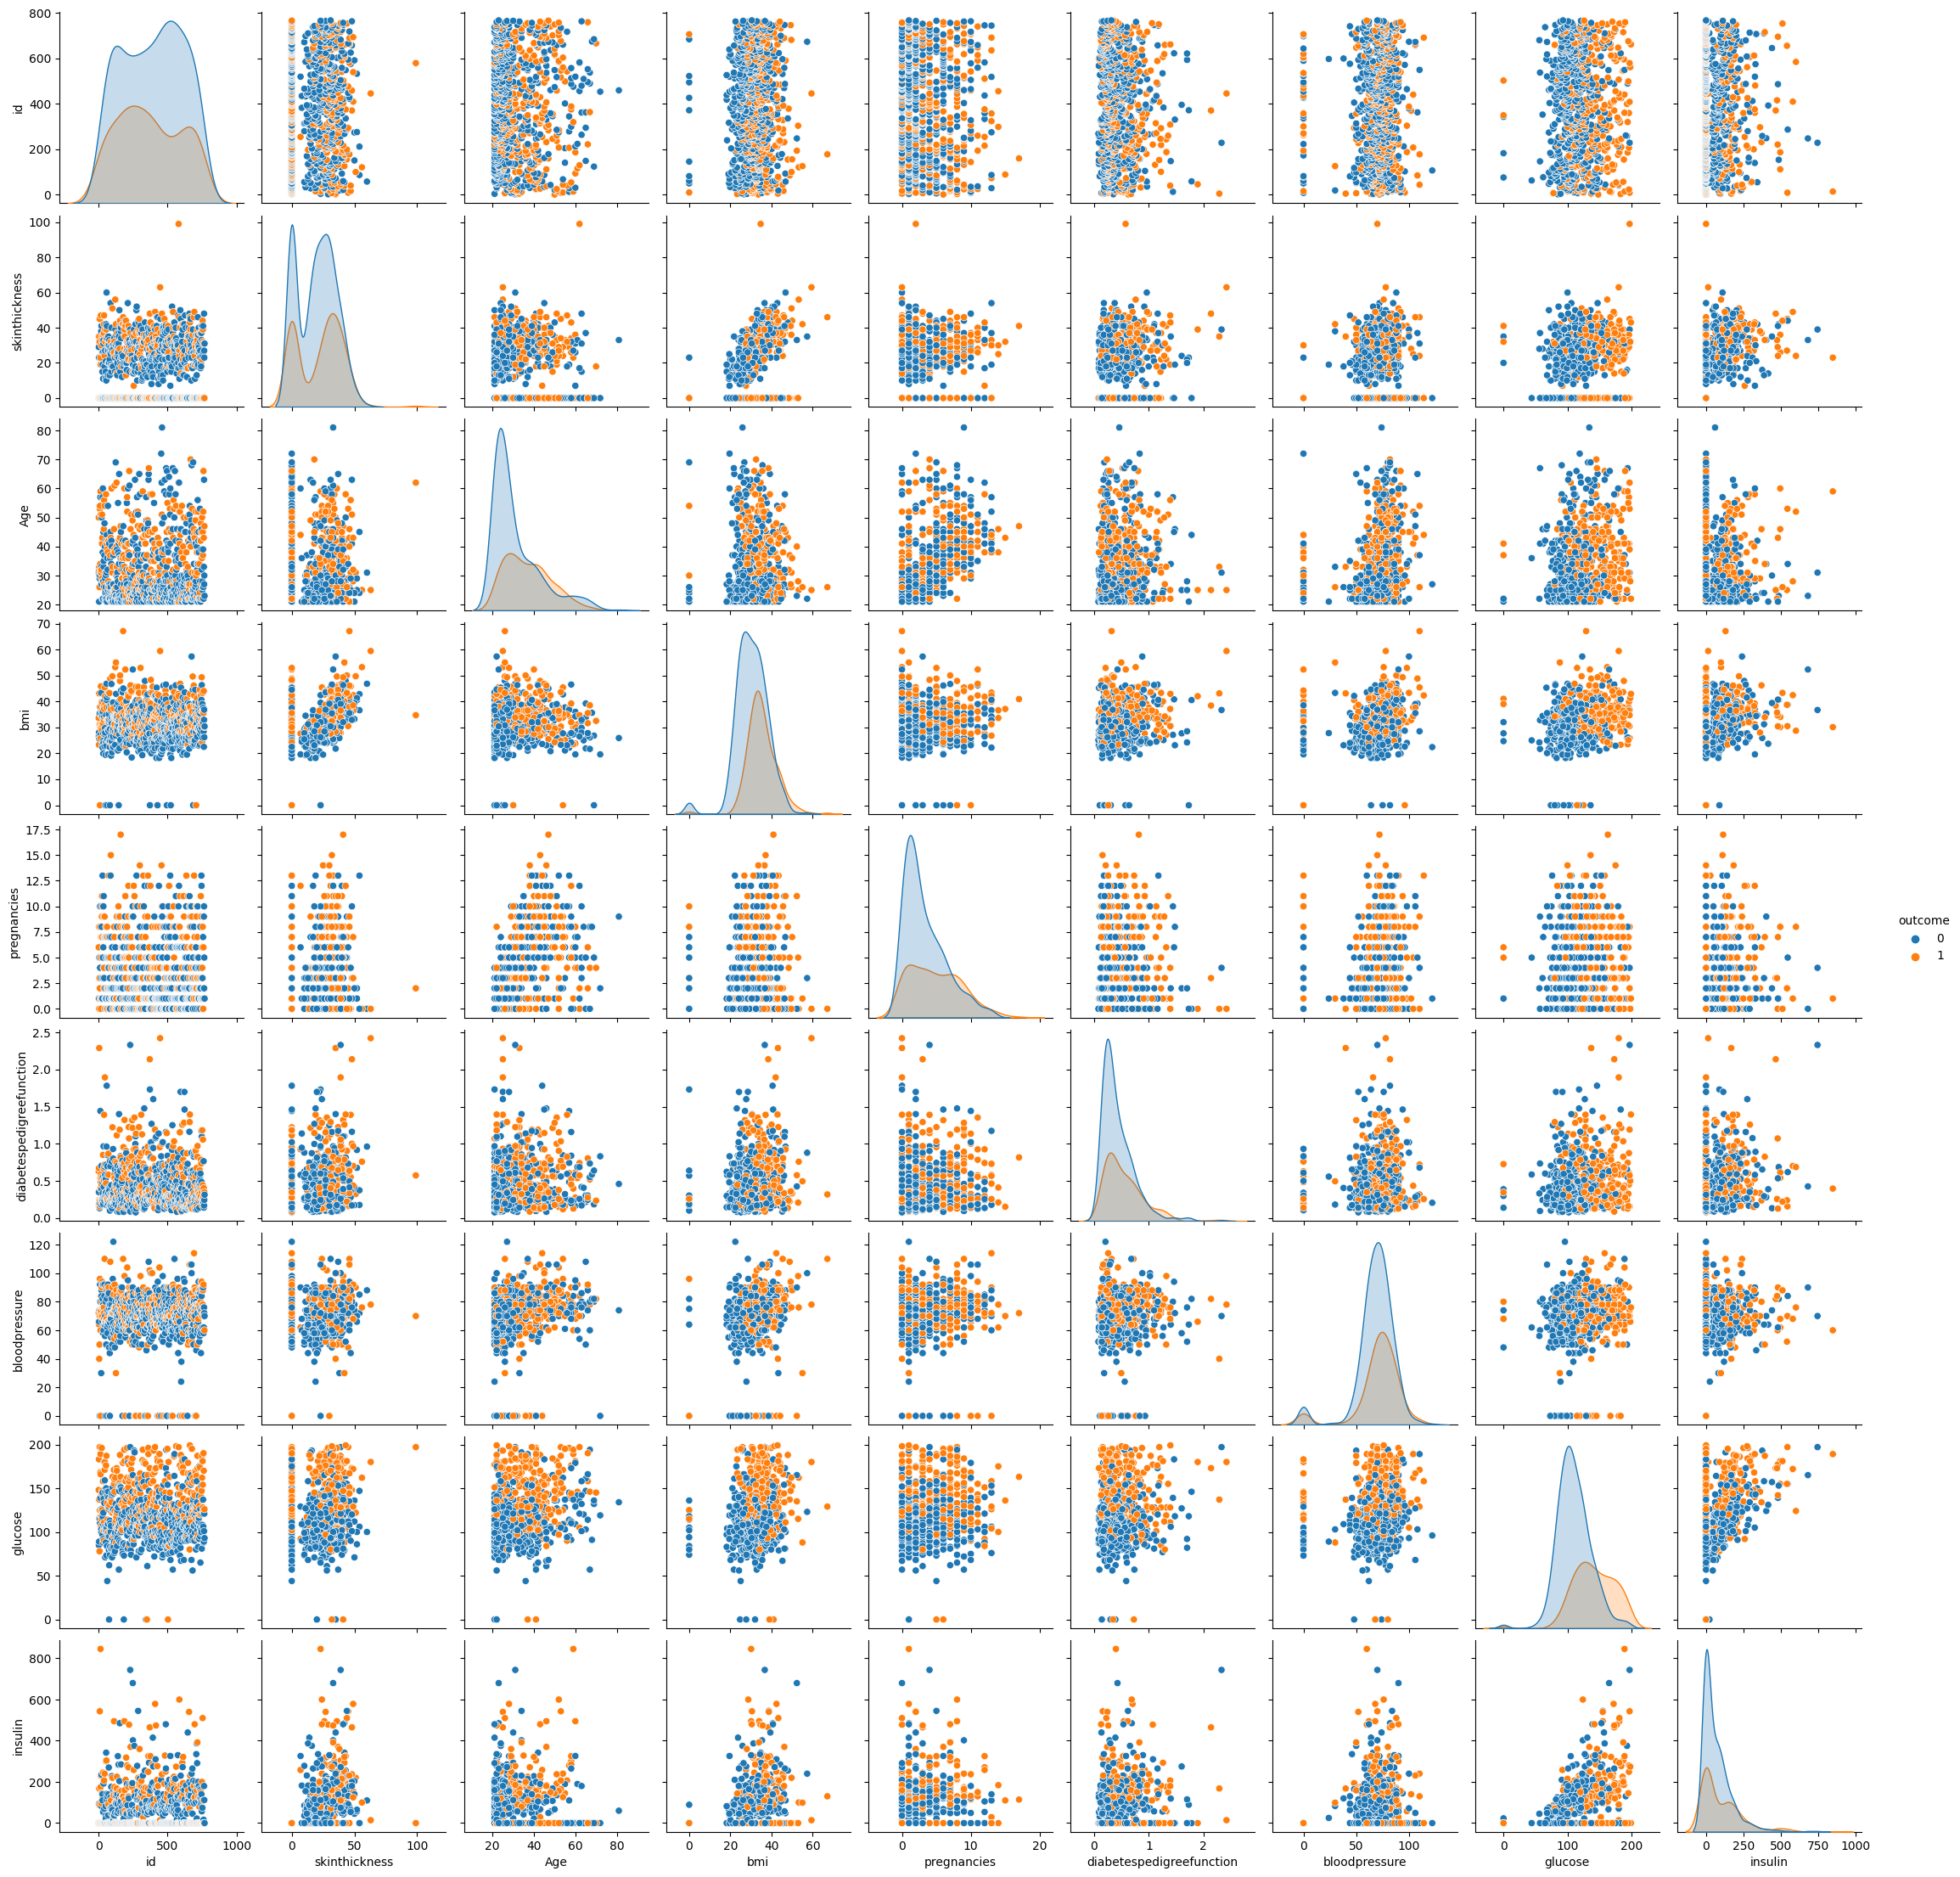

In [51]:
sns.pairplot(df_date, hue='outcome')

In [73]:
# try to drop all 0 bmi, bloodpressure or skinthickness rows 

df_drop = df_date[(df_date['bmi'] != 0) & (df_date['bloodpressure'] != 0) & (df_date['skinthickness'] != 0) & (df_date['pregnancies'] <= 10)]


In [74]:
df_drop.describe()

id  skinthickness         Age         bmi  pregnancies   
count  514.000000     514.000000  514.000000  514.000000   514.000000  \
mean   386.533074      29.025292   30.918288   32.783074     3.112840   
std    218.817627      10.516178   10.420269    6.879183     2.759868   
min      1.000000       7.000000   21.000000   18.200000     0.000000   
25%    201.500000      21.000000   23.000000   27.800000     1.000000   
50%    387.500000      29.000000   27.000000   32.700000     2.000000   
75%    569.750000      36.000000   36.000000   36.800000     5.000000   
max    768.000000      99.000000   81.000000   67.100000    10.000000   

       diabetespedigreefunction     outcome  bloodpressure     glucose   
count                514.000000  514.000000     514.000000  514.000000  \
mean                   0.500846    0.319066      71.202335  119.525292   
std                    0.343808    0.466569      12.385850   33.224388   
min                    0.085000    0.000000      24.000000    0.000000   
25%                    0.259250    0.000000      64.000000   97.000000   
50%                    0.415000    0.000000      70.000000  114.000000   
75%                    0.653500    1.000000      80.000000  139.750000   
max                    2.420000    1.000000     110.000000  199.000000   

          insulin  
count  514.000000  
mean   114.352140  
std    124.040515  
min      0.000000  
25%      0.000000  
50%     89.000000  
75%    165.750000  
max    846.000000

<Axes: >

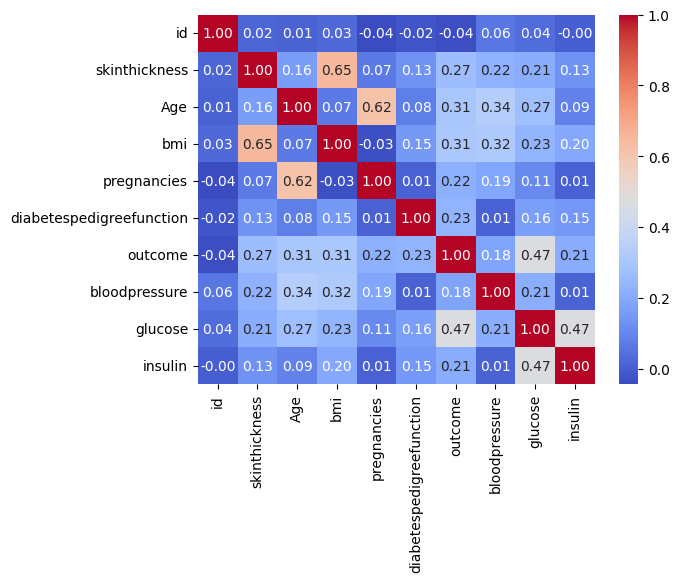

In [75]:
sns.heatmap(df_drop.corr(), annot=True, cmap='coolwarm', fmt='.2f')

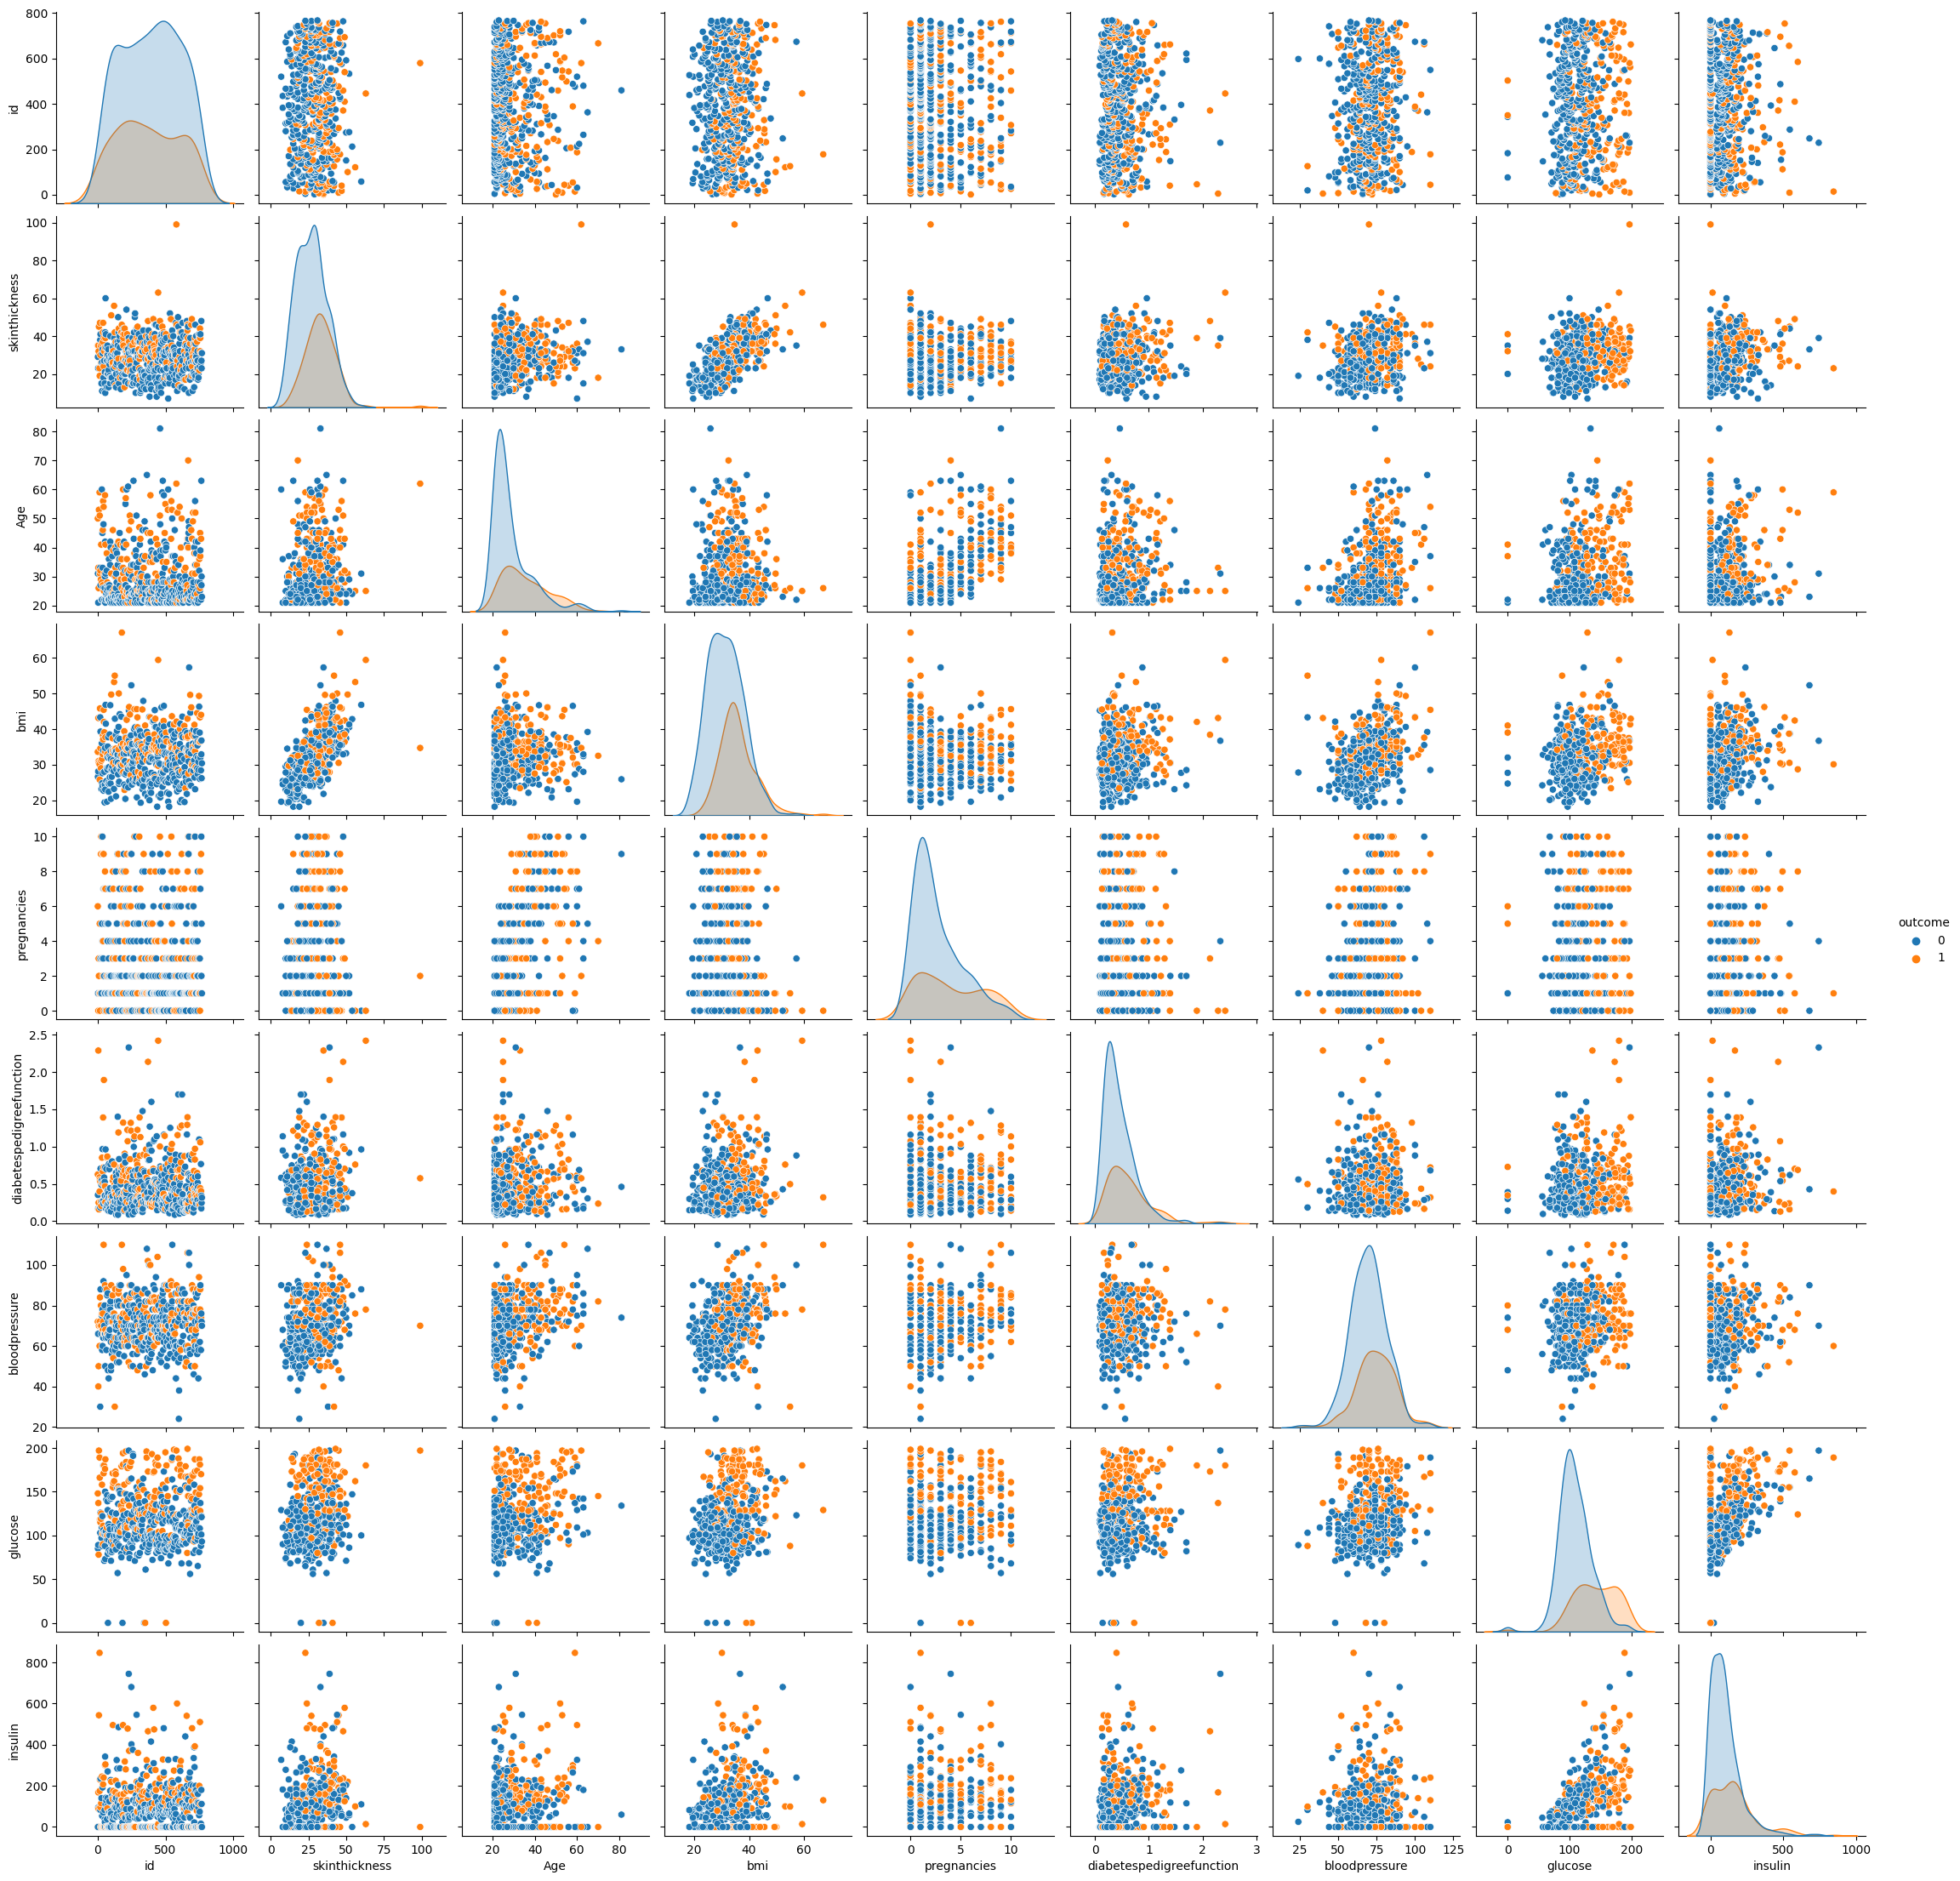

In [76]:
sns.pairplot(df_drop, hue='outcome')

<Axes: xlabel='bmi', ylabel='skinthickness'>

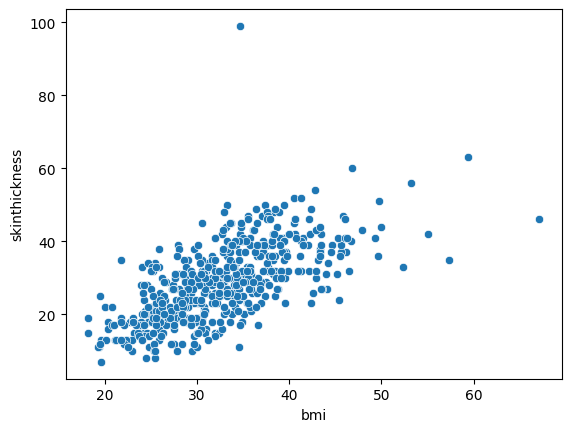

In [77]:

sns.scatterplot(data=df_drop, x='bmi', y='skinthickness')

In [147]:
df_date_skin = df_date.drop(columns=['skinthickness'])

#df_date_skin_1: dropped 2022-12-13 and skinthickness col (because of correlation with bmi) and removed 0 bmi and bloodpressure and pregnancies > 10
df_date_skin_1 = df_date_skin[(df_date_skin['bmi'] != 0) & (df_date_skin['bloodpressure'] != 0) & (df_date_skin['pregnancies'] <= 10)]

#same as df_date_skin but 0 bmi & bloodpressure replaced by NA --> for later imputation
df_date_skin_2 = df_date_skin.copy()
df_date_skin_2['bmi'] = df_date_skin_2['bmi'].replace(0, np.nan)
df_date_skin_2['bloodpressure'] = df_date_skin_2['bloodpressure'].replace(0, np.nan)


<Axes: >

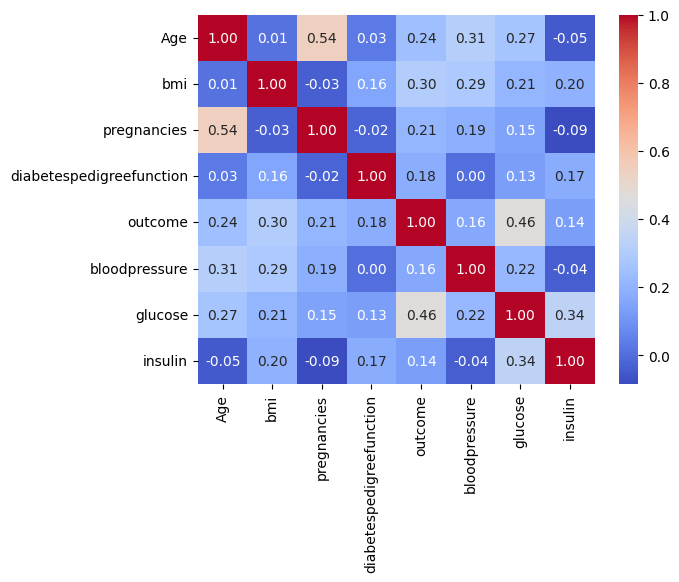

In [85]:
sns.heatmap(df_date_skin_1.corr(), annot=True, cmap='coolwarm', fmt='.2f')


## We have 3 datasets right now

1. df_drop: where all the 0's were droppen (bmi, blood_pressure, skinthickness) + pregnancies > 10

2. df_date_skin_1: dropped 2022-12-13 and skinthickness col (because of correlation with bmi) and removed 0 bmi and bloodpressure and pregnancies > 10

3. df_date_skin_2: same as df_date_skin but 0 bmi & bloodpressure replaced by NA --> for later imputation

### Feature engineering

1. Train-test-split

2. defining groups of features: numerical, categorical, individual treatment (if imputing)

    - Scaling (logistic regression)
    - Imputing
    - Categorization/Classification

3. Choosing different models:

    - KNN
    - Logistic Regression
    - Classification Tree

In [157]:
# import all the necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import sklearn


In [ ]:
# calculate a baseline model which only predicts the mean
df_drop['outcome'].value_counts(normalize=True)


outcome
0    0.680934
1    0.319066
Name: proportion, dtype: float64

In [137]:
#baseline model just predicts 0 for the length of y1: we need a pandas series with 514 0 entries
import numpy as np
y_baseline = pd.Series(np.zeros(len(y_test1)))
#another baseline model: y_baseline2 as a pd.Series which guesses for each entry a 0 or 1 with a probability of 0.5
y_baseline2 = pd.Series(np.random.choice([0, 1], size=len(y_test1), p=[0.68, 0.32]))

In [148]:
#prepare X and y for all 3 datasets
X1 = df_drop.drop(columns=['outcome'])
y1 = df_drop['outcome']

X2 = df_date_skin_1.drop(columns=['outcome'])
y2 = df_date_skin_1['outcome']

X3 = df_date_skin_2.drop(columns=['outcome'])
y3 = df_date_skin_2['outcome']


In [96]:
X1.columns

Index(['skinthickness', 'Age', 'bmi', 'pregnancies',
       'diabetespedigreefunction', 'bloodpressure', 'glucose', 'insulin'],
      dtype='object')

In [149]:
# split into train and test sets for all 3 datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

In [140]:
#feature engineering for ds 1
num_f_1 = ['skinthickness', 'bmi', 'pregnancies', 'diabetespedigreefunction', 'glucose', 'insulin']
cat_f_1 = ['Age', 'bloodpressure']

num_f_2 = ['bmi', 'pregnancies', 'diabetespedigreefunction', 'glucose', 'insulin']
cat_f_2 = ['Age', 'bloodpressure']

In [99]:
df_drop['Age'].describe()

count    514.000000
mean      30.918288
std       10.420269
min       21.000000
25%       23.000000
50%       27.000000
75%       36.000000
max       81.000000
Name: Age, dtype: float64

In [ ]:
#pipelines for dataframe 1
num_f1_pipe = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_f1_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('binning', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'))
])

transformer1 = ColumnTransformer(transformers=[
    ('num', num_f1_pipe, num_f_1),
    ('cat', cat_f1_pipe, cat_f_1)
])

model1 = Pipeline(steps=[
    ('preprocessor', transformer1),
    ('model', LogisticRegression(random_state=42))
])

model1.fit(X_train1, y_train1)
y_test1_pred = model1.predict(X_test1)

In [141]:
# pipelines for dataframe 2
num_f2_pipe = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_f2_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('binning', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'))
])

transformer2 = ColumnTransformer(transformers=[
    ('num', num_f2_pipe, num_f_2),
    ('cat', cat_f2_pipe, cat_f_2)
])

model2 = Pipeline(steps=[
    ('preprocessor', transformer2),
    ('model', LogisticRegression(random_state=42))
])

model2.fit(X_train2, y_train2)
y_test2_pred = model2.predict(X_test2)
y_train2_pred = model2.predict(X_train2)

In [142]:
# cross validation first for certain evaluation metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores1 = cross_val_score(model1, X_train1, y_train1, cv=cv, scoring='roc_auc')
cv_scores1

cv_scores2 = cross_val_score(model2, X_train2, y_train2, cv=cv, scoring='roc_auc')
cv_scores2.mean()

0.8316161623928338

In [ ]:
cv_scores1.mean()

0.809004884004884

In [114]:
model1.score(X_test1, y_test1)

y_train1_pred = model1.predict(X_train1)


# evaluate with roc_auc_score for train and test
print(roc_auc_score(y_train1, y_train1_pred))
print(roc_auc_score(y_test1, y_test1_pred))

print(mean_squared_error(y_test1, y_test1_pred))



0.7092966194111232
0.7904761904761904
0.1650485436893204


In [ ]:
# compare with baseline models
print(roc_auc_score(y_test1, y_baseline))
print(roc_auc_score(y_test1, y_baseline2))

print(mean_squared_error(y_test1, y_baseline))
print(mean_squared_error(y_test1, y_baseline2))

0.5
0.4632034632034632
0.32038834951456313
0.44660194174757284


In [111]:
model1.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['skinthickness', 'bmi', 'pregnancies',
                                     'diabetespedigreefunction', 'glucose',
                                     'insulin']),
                                   ('cat',
                                    Pipeline(steps=[('scaler', StandardScaler()),
                                                    ('binning',
                                                     KBinsDiscretizer(encode='ordinal',
                                                                      n_bins=4,
                                                                      strategy='uniform'))]),
                                    ['Age', 'bloodpressure'])])),
  ('model', LogisticRegression(random_state=42))],
 'verbose': False,
 'preprocessor': ColumnTransformer(tran

### Model testing with 3rd dataframe 

1. define possible models

    - baseline
    - KNN
    - Decision Tree
    - Logistic Regression

2. Feature Engineering

    - Scaling (num)
    - Impute (num)
    - Binning (cat)

3. Model fitting

4. Evaluation

    - Decide for a metric
    - CV
    - GridSearch (search for hyperparams)
    - compare models
    

In [163]:
#baseline model just predicts 0 for the length of y1: we need a pandas series with 514 0 entries
#another baseline model: y_baseline2 as a pd.Series which guesses for each entry a 0 or 1 with a probability of 0.5
y_baseline3 = pd.Series(np.random.choice([0, 1], size=len(y_test3), p=[0.68, 0.32]))

In [150]:
X3 = df_date_skin_2.drop(columns=['outcome'])
y3 = df_date_skin_2['outcome']

In [151]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42, stratify=y3)

In [168]:
# feature engineering
num_f3 = ['pregnancies', 'diabetespedigreefunction', 'glucose', 'insulin']
cat_f3 = ['Age']

num_pipe3 = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipe3 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('binning', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'))
])

bmi_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

bp_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('binning', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'))
])

transformer3 = ColumnTransformer(transformers=[
    ('num', num_pipe3, num_f3),
    ('cat', cat_pipe3, cat_f3),
    ('bmi', bmi_pipe, ['bmi']),
    ('bp', bp_pipe, ['bloodpressure'])
])


model3 = Pipeline(steps=[
    ('preprocessor', transformer3),
    ('model', LogisticRegression(random_state=42))
])

model4 = Pipeline(steps=[
    ('preprocessor', transformer3),
    ('model', KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski'))
])

model5 = Pipeline(steps=[
    ('preprocessor', transformer3),
    ('model', DecisionTreeClassifier(random_state=42))
])

model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_train3)
y_pred3_test =model3.predict(X_test3)

model4.fit(X_train3, y_train3)
y4_pred3 = model4.predict(X_train3)
y4_pred3_test =model4.predict(X_test3)

model5.fit(X_train3, y_train3)
y5_pred3 = model5.predict(X_train3)
y5_pred3_test =model5.predict(X_test3)

In [ ]:
#cross validation
cv = StratifiedKFold(n_splits=5, random_state= 42, shuffle=True)
cv_3_roc = cross_val_score(model3, X_train3, y_train3, cv=cv, scoring='roc_auc')
cv_3_mse = cross_val_score(model3, X_train3, y_train3, cv=cv, scoring='neg_mean_squared_error')

print(cv_3_roc)
print(cv_3_mse)

[0.77669173 0.82105263 0.83938224 0.83706564 0.86409266]
[-0.27777778 -0.21296296 -0.22429907 -0.19626168 -0.20560748]


In [177]:
# baseline model evaluation metrics
print('Log Reg (test): roc_auc', roc_auc_score(y_test3, y_pred3_test))
print('Baseline (test): roc_auc', roc_auc_score(y_test3, y_baseline3))

Log Reg (test): roc_auc 0.6920987654320988
Baseline (test): roc_auc 0.551358024691358


In [169]:
cv_4_roc = cross_val_score(model4, X_train3, y_train3, cv=cv, scoring='roc_auc')
cv_4_mse = cross_val_score(model4, X_train3, y_train3, cv=cv, scoring='neg_mean_squared_error')

cv_5_roc = cross_val_score(model5, X_train3, y_train3, cv=cv, scoring='roc_auc')
cv_5_mse = cross_val_score(model5, X_train3, y_train3, cv=cv, scoring='neg_mean_squared_error')

In [179]:
print('Logistic Regression (train): roc_auc', cv_scores3_roc.mean())
print('Logistic Regression (train): neg_mean_squared_error', cv_scores3_mse.mean())

print('KNN (train): roc_auc', cv_4_roc.mean())
print('KNN (train): neg_mean_squared_error', cv_4_mse.mean())

print('Decision Tree (train): roc_auc', cv_5_roc.mean())
print('Decision Tree (train): neg_mean_squared_error', cv_5_mse.mean())

Logistic Regression (train): roc_auc 0.8276569802885593
Logistic Regression (train): neg_mean_squared_error -0.2233817930079612
KNN (train): roc_auc 0.7647053444421866
KNN (train): neg_mean_squared_error -0.2830218068535825
Decision Tree (train): roc_auc 0.6399491973176182
Decision Tree (train): neg_mean_squared_error -0.3350640359986154


In [201]:
roc_auc_score(y_train3, y_pred3)

0.7414438502673798

### GridSearch for Hyperparameters

In [200]:
model3.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['pregnancies', 'diabetespedigreefunction',
                                     'glucose', 'insulin']),
                                   ('cat',
                                    Pipeline(steps=[('scaler', StandardScaler()),
                                                    ('binning',
                                                     KBinsDiscretizer(encode='ordinal',
                                                                      n_bins=4,
                                                                      strategy='uniform'))]),
                                    ['Age']),
                                   ('bmi',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median

In [198]:
grid_params3 = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__class_weight': [None, 'balanced'],
    'model__max_iter': [100, 200, 300]
}

grid_params4 = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_params5 = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [2, 4]
}

In [ ]:
gs_3 = GridSearchCV(model3, grid_params3, cv=cv, scoring='roc_auc', n_jobs=-1)
gs_3.fit(X_train3, y_train3)
y_gs3_pred = gs_3.predict(X_train3)
y_gs3_test = gs_3.predict(X_test3)
#print(gs_3.best_estimator_)
print(roc_auc_score(y_train3, y_gs3_pred))

0.7361650114591292


In [206]:
gs_3_cross_val = cross_val_score(gs_3, X_train3, y_train3, cv=cv, scoring='roc_auc')
gs_3_cross_val.mean()

0.830276366592156

In [211]:
gs_4 = GridSearchCV(model4, grid_params4, cv=cv, scoring='roc_auc', n_jobs=-1)
gs_4.fit(X_train3, y_train3)
y_gs4_pred = gs_4.predict(X_train3)
y_gs4_test = gs_4.predict(X_test3)
#print(gs_4.best_estimator_)
print(roc_auc_score(y_train3, y_gs4_pred))

1.0


In [212]:
y_gs4_proba = gs_4.predict_proba(X_train3)[:, 1]
print(roc_auc_score(y_train3, y_gs4_proba))

1.0


In [208]:
gs_4_cross_val = cross_val_score(gs_4, X_train3, y_train3, cv=cv, scoring='roc_auc')
gs_4_cross_val.mean()

0.7825431822800244

In [210]:
gs_4_cross_val

array([0.75789474, 0.72161654, 0.79150579, 0.80328185, 0.83841699])

In [ ]:
gs_5 = GridSearchCV(model5, grid_params5, cv=cv, scoring='roc_auc', n_jobs=-1)
gs_5.fit(X_train3, y_train3)
y_gs5_pred = gs_5.predict(X_train3)
y_gs5_test = gs_5.predict(X_test3)
#print(gs_5.best_estimator_)
print(roc_auc_score(y_train3, y_gs5_pred))

0.7894270435446906


In [209]:
gs_5_cross_val = cross_val_score(gs_5, X_train3, y_train3, cv=cv, scoring='roc_auc')
gs_5_cross_val.mean()

0.7648862019914653

<Axes: >

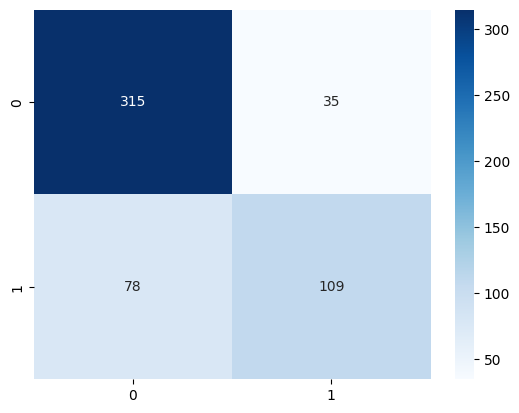

In [167]:
#plot confusion matrix for y_train3 vs y_pred3_train
confusion_matrix(y_train3, y_pred3)
sns.heatmap(confusion_matrix(y_train3, y_pred3), annot=True, fmt='d', cmap='Blues')
